# Review text analysis

In [1]:
# import the required libraries here
# two lines of code here:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('reviews_filtered.csv')

Let's remind ourselves what our review DataFrame looked like, and check we're reading it in as expected.

In [3]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,eU_713ec6fTGNO4BegRaww,0,2013-01-20 13:25:59,0,fdiNeiN_hoCxCMy2wTRW9g,4,I'll be the first to admit that I was not exci...,0,w31MKYsNFMrjhWxxAb5wIw
1,FxLfqxdYPA6Z85PFKaqLrg,0,2016-05-07 01:36:53,0,Z7wgXp98wYB57QdRY3HQ3w,4,Wow. So surprised at the one and two star revi...,0,GYNnVehQeXjty0xH7-6Fhw
2,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw
3,y-Iw6dZflNix4BdwIyTNGA,0,2014-06-27 21:19:23,0,4bUyL7lzoWzDZaJETAKREg,3,Good selection of classes of beers and mains. ...,0,_N7Ndn29bpll_961oPeEfw
4,qx6WhZ42eDKmBchZDax4dQ,0,2017-03-27 01:14:37,0,Amo5gZBvCuPc_tZNpHwtsA,5,"Our family LOVES the food here. Quick, friendl...",1,DzZ7piLBF-WsJxqosfJgtA


We see the first review wasn't great, at two stars, but the second got five stars. Let's have a quick look at the full text for each.

## A two star review

In [114]:
reviews.loc[0, 'text']

'I\'ll be the first to admit that I was not excited about going to La Tavolta. Being a food snob, when a group of friends suggested we go for dinner I looked online at the menu and to me there was nothing special and it seemed overpriced.  Im also not big on ordering pasta when I go out. Alas, I was outnumbered. Thank goodness! I ordered the sea bass special. It was to die for. Cooked perfectly, seasoned perfectly, perfect portion. I can not say enough good things about this dish. When the server asked how it was he seemed very proud of the dish and said, " doesn\'t she (the chef) do an incredible job?" She does. \r\n\r\nMy hubby got the crab tortellini and also loved his. I heard "mmmm this is so good" from all around the table. Our waiter was super nice and even gave us free desserts because we were some of the last people in the restaurant. Service was very slow and the place was PACKED but we had our jugs of wine and a large group with good conversation so it didn\'t seem to bother

This review does appear somewhat lukewarm, at best. On another note, we can see it talks about pizza and italian, which is some reassurance we made a good decision to combine the pizza and italian categories.

## A five star review

In [5]:
reviews.loc[1, 'text']

"Wow. So surprised at the one and two star reviews!  We started with the most tender calamari. Although the marinara sauce was a bit bland, but a touch of salt made it just right. My husband had the veal with peppers and said it was so delicious and tender. The mashed potatoes were perfect. I had the salmon Diablo which was also delicious. Our salad was beautiful! Dressing was served on the salad and it was a nice amount. We ended our delicious meal with a piece of tiramisu. Our server Matt was right on!! Very pleasant and knowledgeable about the menu. Our appetizer, salad and entrees were timed perfectly. I love salad and did not mind that my entree was served while I was still eating it! No problem it let my dinner cool to just the right temp for me to eat it comfortably. \r\nI wonder sometimes if people just don't appreciate relaxing and taking time to eat a wonderful and beautifully prepared meal.  A wonderful atmosphere. So relaxing. The chairs are super comfortable too!!! We will

This certainly seems to be a good review. We'd be happy to see our restaurant associated with "cool atmosphere", "all around great experience" etc.

## Good and bad reviews
We don't want to have to read all the reviews in our dataset in order to find good and bad ones. Clearly 5 is best and 1 is worst, but how do we group them? Do we set a threshold in the middle, or just take the top and bottom ratings? Let's first see what the distribution of ratings looks like.

In [6]:
reviews['stars'].describe()

count    594862.000000
mean          3.718837
std           1.403135
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [7]:
star_counts = reviews['stars'].value_counts()

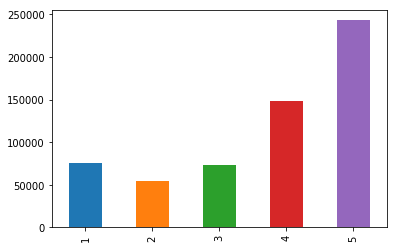

In [8]:
# task: create a bar plot of number of reviews for each star rating
# hint: sort_index may be useful to get your x-axis in the most intuitive order
star_counts.sort_index().plot(kind='bar')

This is useful. It seems reviews with three stars or fewer are in the bottom quartile and reviews with five stars are in the top quartile. We could take five stars as being a single, best category, and three stars and fewer as being 'not good'.

## Visualizing reviews
From our analysis of the distribution of review star ratings, our first approach to delivering an answer to the marketing team will be to look at the most popular words in the best reviews and compare them with those in the worst reviews.

First, let's extract the good and bad reviews separately.

In [9]:
# task, filter the 'text' column using the 'stars' column to create Series of good and bad review text
# call the results good_review_text and bad_review_text, respectively
# two lines of code here:
good_review_text = reviews.loc[reviews.stars==5, 'text']
bad_review_text =reviews.loc[reviews.stars<=3, 'text']

We can now double check how many rows we have, and that they seem to agree with the numbers of reviews we'd expect from the distribution of stars ratings above.

In [10]:
good_review_text.shape

(243057,)

In [11]:
bad_review_text.shape

(203707,)

Now that's actually quite a lot of reviews. For our purposes here, we'll start by just selecting the first 1000 reviews from each group on the assumption that they're randomly ordered. We'll also add a slight tidying step of converting the characters to lower case so we don't count 'Bad' and 'bad', for example, separately.

In [12]:
# task: select the first 1000 items in each of the good and bad review text Series and chain the
# str.lower() method to convert characters to lower case. Save the results back in place.
# two lines of code here:
good_review_text = good_review_text.iloc[:1000].str.lower()
bad_review_text = bad_review_text.iloc[:1000].str.lower()

In [13]:
# Check first few good reviews
good_review_text.head()

2     you can't really find anything wrong with this...
4     our family loves the food here. quick, friendl...
6     their pettuccine was fresh-made in the morning...
9     this place epitomizes the rumored transformati...
14    this place is quite possibly my favorite resta...
Name: text, dtype: object

In [14]:
# check first few bad reviews
bad_review_text.head()

3     good selection of classes of beers and mains. ...
7     came here on a thursday night at 6:30 p.m. my ...
8     went here last weekend and was pretty disappoi...
11    th service here is very hit or miss... sometim...
12    i took my wife out for a birthday dinner with ...
Name: text, dtype: object

So far, we've partitioned our reviews into groups we think of as 'great' and 'bad'. Our problem now is how to make sense of this. How do we interpret, or visualise, the information? A great way to get a visual look at how frequently certain words occur is by a wordcloud. A nice introduction to creating wordclouds is [here](https://www.datacamp.com/community/tutorials/wordcloud-python) in a DataCamp community article. You'll likely want to pay attention to the step for installing the relevant library in order to get the next import statement to work.

In [15]:
# task: import WordCloud and STOPWORDS here
# one line of code here
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

We first need to gather the reviews into a single corpus, for each of good and bad reviews, for wordcloud.

In [16]:
# task: combine all the good and bad review text into a single string for each
# two lines of code here
good_text = ' '.join(review for review in good_review_text)
bad_text = ' '.join(review for review in bad_review_text)

### Good wordcloud

Now, at last, we can create a wordcloud! Let's look at the top 50 words from the best reviews.

In [17]:
# task: generate a wordcloud of good review words, max 50 words
# one line of code here, call the result good_wordcloud
good_wordcloud = WordCloud(max_words=50).generate(good_text)

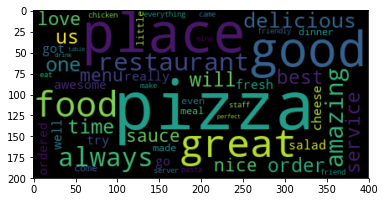

In [18]:
plt.imshow(good_wordcloud, interpolation='bilinear')

This is great! It looks sensible. In fact, someone from marketing just walked past your screen and already is interested in taking this image as it is and using it! They're so excited they would like a copy of that image to test in laying out their new marketing designs.

In [19]:
# task: use the to_file method for wordcloud to save the above image to send to marketing
# one line of code here
#good_wordcloud.to_file('./5_star_wordcloud.png')

### Bad wordcloud

Can we learn anything extra from looking at the top words in bad reviews?

In [20]:
# task: generate a wordcloud of bad review words, max 50 words
# one line of code here, call the result bad_wordcloud
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)

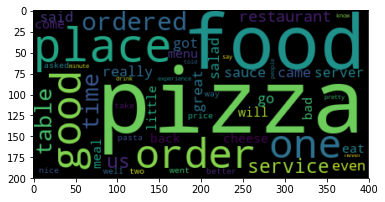

In [21]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

We notice some things here. Firstly, 'pizza' is a very prominent word, but it was in the top reviews as well. It's very obviously a relevant word for our target category, but is it useful in separating good and bad reviews? Probably not. We can also start to make some interesting observations that there seem to be more "dull" words here, such as "told", "said", "came", and "went". There is clearly a different tone between our two wordclouds. We've definitely achieved something useful here.

# Summary
Congratulations! You've achieved a lot since starting this project. You've related a business problem to a dataset and identified which data you needed. You've drilled into that data to answer an initial question of which food category the business should target. Then you've used knowledge gained from that to extract just the related reviews from a large file that, otherwise, would be too large to handle. You've further teased apart the best and the worst reviews to look at them separately and clearly seen there is a difference.

You already have a useful output, but you know that there's more that can be done. The rest of the notebook is entirely optional and gives some ideas for how you might refine what you've already done.

# Towards a better wordcloud

Having seen that some words that occur prominently in bad reviews were also in our good reviews, we can exclude these from our wordcloud by specifying them as stopwords. Let's add them to the list of default stopwords STOPWORDS.

In [22]:
bad_stopwords = set(['pizza', 'food', 'order', 'place', 'good','italian'])
# added 'good' to list since it was prominent in both clouds

In [23]:
# task: create a set of stopwords and add the "bad" ones above to it
# two lines of code here:
stopwords = set(STOPWORDS)
stopwords.update(bad_stopwords)

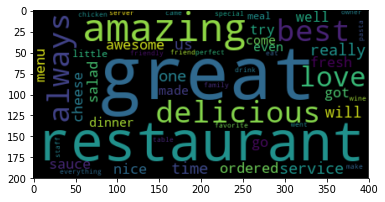

In [24]:
# task: generate a better wordcloud of good review words, max 50 words
# one line of code here, call the result better_wordcloud
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)
plt.imshow(better_wordcloud, interpolation='bilinear')

Hopefully you can see we've now excluded some words. We'll leave it up to you and your marketing team whether you prefer the above version!

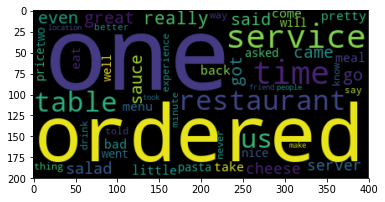

In [25]:
worse_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(bad_text)
plt.imshow(worse_wordcloud, interpolation='bilinear')

In [26]:
# No point in saving these out more than just the first time
# better_wordcloud.to_file('./five_star_wordcloud.png')
# worse_wordcloud.to_file('./low_star_wordcloud.png')

# Beyond words
The use of single words is a good start, but words occur in sequences and sequences can have much additional meaning. Consider a good review that said "Highly recommended" and a bad review that said "Not recommended". Analysing just single words, we would lose the "highly recommended" tag. What's more, with the approach of looking for words in good reviews that aren't in bad reviews, we would lose the word "recommended" entirely. Using sequences of two words, or bi-grams as they're known, would tackle this issue. Generally, in fact, we can consider n-grams.

In [27]:
import string

We import string to get the fastest way to remove all the punctuation since we only want words. The results differ noticeably from before I added the cleaning step.

In [28]:
five_star_text = reviews.loc[reviews['stars'] == 5,'text'].str.lower()
five_star_text = ' '.join(review for review in five_star_text).translate(str.maketrans('', '', string.punctuation))

In [29]:
low_star_text = reviews.loc[reviews['stars'] <= 3,'text'].str.lower()
low_star_text = ' '.join(review for review in low_star_text).translate(str.maketrans('', '', string.punctuation))

In [30]:
len(five_star_text)

109840296

In [31]:
from collections import Counter

In [33]:
five_star_count = Counter(five_star_text.split())

In [34]:
five_star_count.most_common(5)

[('the', 1085938),
 ('and', 816726),
 ('a', 513948),
 ('i', 454798),
 ('to', 414073)]

In [35]:
five_star_dict = dict(five_star_count)

In [36]:
text_set = set(five_star_dict.keys())

In [37]:
junk_words = stopwords.intersection(text_set)

In [38]:
for word in junk_words:
    five_star_dict.pop(word)

In [39]:
cleaned_five_star_count = Counter(five_star_dict)

In [40]:
cleaned_five_star_count.most_common(10)

[('great', 153059),
 ('service', 89569),
 ('best', 70981),
 ('time', 63312),
 ('delicious', 62552),
 ('back', 61801),
 ('amazing', 60192),
 ('will', 59665),
 ('one', 59359),
 ('love', 56265)]

In [41]:
low_star_count = Counter(low_star_text.split())

In [42]:
low_star_dict = dict(low_star_count)
text_set_low = set(low_star_dict.keys())
junk_words_low = stopwords.intersection(text_set_low)
for word in junk_words_low:
    low_star_dict.pop(word)
cleaned_low_star_count = Counter(low_star_dict)

In [43]:
cleaned_low_star_count.most_common(10)

[('service', 96311),
 ('time', 82233),
 ('one', 81943),
 ('ordered', 79703),
 ('us', 74853),
 ('back', 74202),
 ('go', 59674),
 ('really', 58127),
 ('restaurant', 57905),
 ('got', 54883)]

In [44]:
print(len(cleaned_five_star_count))
print(len(cleaned_low_star_count))

144169
166465


In [45]:
favorable_candidates = cleaned_five_star_count.most_common()[0:1000]

In [46]:
favorable_candidates[2][0]

'best'

Okay, we're going to take our favorable candidates, then find the difference in usage between high and low ratings so we find the words with greatest advantage, and we're also going to compare frequency in high vs. low rating reviews.

In [47]:
net_favorable_count = [(k,v-cleaned_low_star_count[k], v/(v+cleaned_low_star_count[k] )) for (k,v) in favorable_candidates]

In [48]:
net_favorable_count.sort(key=lambda tup : tup[1])
net_favorable_count[-20:]

[('loved', 13033, 0.788327950090704),
 ('staff', 13051, 0.6041929457599514),
 ('wonderful', 14217, 0.856369378853963),
 ('everything', 14274, 0.6732702112163146),
 ('highly', 14346, 0.8730885259544366),
 ('fantastic', 15339, 0.8574691214169191),
 ('recommend', 17723, 0.7255351098215876),
 ('fresh', 21963, 0.7044477128441904),
 ('favorite', 22157, 0.8257711647601964),
 ('perfect', 22677, 0.865204367571746),
 ('awesome', 22683, 0.8463793787985219),
 ('excellent', 23967, 0.8164294578965435),
 ('definitely', 24279, 0.7145280718186156),
 ('friendly', 25944, 0.7259143155694879),
 ('always', 29868, 0.7232821003528497),
 ('love', 40019, 0.7759512349850367),
 ('best', 49335, 0.7663100391894372),
 ('delicious', 49927, 0.8320629979914069),
 ('amazing', 51137, 0.8692362123990931),
 ('great', 101169, 0.7468150613079352)]

In [49]:
net_favorable_ratio = sorted(net_favorable_count, key = lambda tup:tup[2])
net_favorable_ratio[-20:]

[('bomb', 1879, 0.8375853395616242),
 ('hidden', 2999, 0.8400997958720798),
 ('notch', 3177, 0.8434594594594594),
 ('awesome', 22683, 0.8463793787985219),
 ('fabulous', 4008, 0.8499825358016067),
 ('wonderful', 14217, 0.856369378853963),
 ('fantastic', 15339, 0.8574691214169191),
 ('disappoint', 2644, 0.8625891387822271),
 ('perfect', 22677, 0.865204367571746),
 ('amazing', 51137, 0.8692362123990931),
 ('yum', 3940, 0.8714177978883861),
 ('highly', 14346, 0.8730885259544366),
 ('superb', 2595, 0.8828562997934494),
 ('impeccable', 1687, 0.887459807073955),
 ('phenomenal', 3405, 0.8894989704873026),
 ('heaven', 2334, 0.8897795591182365),
 ('die', 5872, 0.8979398210897263),
 ('incredible', 6577, 0.8992351584314677),
 ('perfection', 4808, 0.907319552694002),
 ('gem', 5871, 0.9465997261524418)]

In [57]:
 Yak = reviews.loc[reviews['text'].apply(lambda x: 'gem' in x),'stars'].describe()

In [58]:
Yak[0]*Yak[1]

61513.0

In [67]:
candidate_words = net_favorable_count[-20:]+net_favorable_ratio[-20:]

In [92]:
%%time
pop_mean = 3.718837
candidate_score =[]
for item in candidate_words:
    stat_series = reviews.loc[reviews['text'].apply(lambda x: item[0] in x),'stars'].describe()
    candidate_score.append((item[0], stat_series[0]*(stat_series[1]-pop_mean)))

Wall time: 21.8 s


In [93]:
candidate_score.sort(key=lambda tup: tup[1],reverse=True)

In [94]:
candidate_score[:15]

[('great', 71275.585306),
 ('delicious', 59563.89579699999),
 ('amazing', 48765.95813399998),
 ('amazing', 48765.95813399998),
 ('love', 43319.67954499997),
 ('best', 40083.86427300002),
 ('perfect', 38380.176877),
 ('perfect', 38380.176877),
 ('friendly', 33933.56307800002),
 ('favorite', 28959.637514000002),
 ('fresh', 27617.20710299998),
 ('definitely', 27143.501599999985),
 ('recommend', 26487.909863999997),
 ('always', 25486.611075999986),
 ('excellent', 23490.136457)]

In [95]:
%%time
pop_mean = 3.718837
oversize_candidates = net_favorable_count[-80:]+net_favorable_ratio[-80:]
oversized_score =[]
for item in oversize_candidates:
    stat_series = reviews.loc[reviews['text'].apply(lambda x: item[0] in x),'stars'].describe()
    oversized_score.append((item[0], stat_series[0]*(stat_series[1]-pop_mean)))

Wall time: 1min 27s


In [96]:
scores_1 = list(set(oversized_score))

In [97]:
len(scores_1)

122

In [98]:
scores_1.sort(key=lambda tup: tup[1],reverse=True)

In [99]:
scores_1[:20]

[('great', 71275.585306),
 ('delicious', 59563.89579699999),
 ('az', 53531.408618),
 ('amazing', 48765.95813399998),
 ('love', 43319.67954499997),
 ('best', 40083.86427300002),
 ('perfect', 38380.176877),
 ('friendly', 33933.56307800002),
 ('favorite', 28959.637514000002),
 ('fresh', 27617.20710299998),
 ('definitely', 27143.501599999985),
 ('recommend', 26487.909863999997),
 ('always', 25486.611075999986),
 ('excellent', 23490.136457),
 ('awesome', 23409.953382999996),
 ('atmosphere', 18974.370271),
 ('fantastic', 16869.96489599999),
 ('wonderful', 16011.156363999999),
 ('every', 15538.94839999997),
 ('die', 13722.700624999976)]

Okay, so by the model of an advertising campaign producing a relative increase in the size of the sub-population associated with the given word, where we assume this sub-population keeps the same star distribution with mean $\bar{x}$. The change in population mean star rating is 
$\frac{(\bar{x}-\mu)*K}{pop size + K}$ for K the number of new reviews consequent to the ad campaign.
By assumption count of new reviews K is proportional to the count of existing such reviews,  and if the K is small compared to the whole population the numerator is sufficient, and even if the count of new reviews was the size of the whole population, using the numerator alone would be off by a factor of two from the true estimated change, and our scores drop quickly enough we can still be confident the top scores are at worst only nearly the best possible words to choose.

In [101]:
az_reviews = reviews.loc[reviews['text'].apply(lambda x: 'az' in x)]

In [110]:
len(az_reviews)

92286

In [116]:
az_reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
2,YvrylyuWgbP90RgMqZQVnQ,0,2017-04-07 21:27:49,0,svK3nBU7Rk8VfGorlrN52A,5,You can't really find anything wrong with this...,0,NJlxGtouq06hhC7sS2ECYw
17,ZLuWpmvO41w2bSwufgfUlQ,3,2010-08-20 22:38:10,0,XRCS5zr29DOxlCXKKKwwAw,5,This is my first yelp. This restaurant was so...,1,2ROluW4TNFbkO3qLtihhaQ
24,0JGMKaKJGVuDus5WcJzvjw,0,2017-04-30 03:37:51,1,oDxnoU49up9-wTnJ7RttBQ,5,Unbelievable experience start to finish.\r\n\r...,2,8DOKugzD27-gGooC1vp4bQ
28,FbUzIBAj2ziuqL2grUgw6Q,0,2014-01-17 03:27:38,4,iSmfAVy6cApgXIYHsldsmA,1,My husband and I used to order from here more ...,6,TTZyVCWsQXXkRIwiwSYKKQ
29,w2xwgqHM7dJlHfyu4ouhBg,0,2017-03-03 18:53:37,0,O4074JMW-wXUL4lsCWM2JA,5,Azzip Pizza is literally SO good. I have been ...,1,zAxCqpH6zknQSRceUMuUfQ


In [118]:
az_reviews.loc[17,'text']

"This is my first yelp.  This restaurant was soo good I felt compelled to yelp about it.  Went for dinner with a friend of mine, really nice space.  All the staff were amazing!!  The chef even came out to our table which was cool.  And the Food, well I think even the most discerning top chef judges would be impressed.  A++ across the board.  We had the tenderloin and mac and cheese.  As well as the tomatoes two ways both are excellent choices.  I can't wait to go back.  Cielo, kudos."

Okay, I don't know how 'az' got to be treated as its own word, but it's a giving rise to a superset of 'amazing' since I'm not checking for whitespace around the string. I will therefore discard it as an artifact of the process.